In [5]:
from os import chdir

# change directory to the root of the project
chdir("../")

# Libraries import


In [6]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
from requests import get

# https://climatologia.meteochile.gob.cl/application/datos/getDatosSaclim/330020_XXXX_PuntoRocio_

# Parameters


In [8]:
STATION_ID = 330020
INPUT_PATH = f"data/input/stations/{STATION_ID}"

# Utilities


In [55]:
from os import remove


def get_dew_point(
    input_path: str,
    station_id: str,
) -> None:
    """_summary_

    Parameters
    ----------
    input_path : str
        _description_
    station_id : str
        _description_
    """
    # download and uncompress zip file
    print(f"Downloading dew point data for station {station_id}")
    zip_file_url = f"https://climatologia.meteochile.gob.cl/application/datos/getDatosSaclim/{station_id}_XXXX_PuntoRocio_"  # noqa: E501
    req = get(zip_file_url, stream=True).content

    zip_file = ZipFile(BytesIO(req))
    zip_info = zip_file.infolist()[0]
    zip_info.filename = "dew_point_history.csv"

    print(f"Uncompressing dew point data for station {station_id}")
    extract_path = f"{input_path}/stations/{station_id}"
    zip_file.extract(zip_info, path=extract_path)

    # replace ',' with ';' in .csv file to allow correct column separation
    history_path = f"{input_path}/stations/{station_id}/{zip_info.filename}"

    with open(history_path, "r") as f:
        lines = f.readlines()
        lines = map(lambda x: x.replace(",", ";"), lines)

    with open(history_path, "w") as f:
        f.writelines(lines)

    dew_point_data = pd.read_csv(f"{extract_path}/dew_point_history.csv", sep=";")

    dew_point_data.drop(columns=["CodigoNacional"], inplace=True)
    dew_point_data.rename(
        columns={
            "momento": "timestamp",
            "Td_Valor": "dew_point_temp",
        },
        inplace=True,
    )
    dew_point_data.set_index("timestamp", inplace=True)

    dew_point_data.to_parquet(f"{extract_path}/dew_point_history.parquet")
    remove(f"{extract_path}/dew_point_history.csv")


get_dew_point(
    "data/input",
    330020,
)

Uncompressing dew point data for station 330020


In [56]:
dew_point_data = pd.read_parquet("data/input/stations/330020/dew_point_history.parquet")
dew_point_data

,dew_point_temp
timestamp,
01-03-1967 00:00:00,NaN
01-03-1967 12:00:00,11.6
01-03-1967 18:00:00,16.0
02-03-1967 00:00:00,17.9
02-03-1967 12:00:00,12.7
...,...
18-10-2023 03:00:00,4.1
18-10-2023 04:00:00,4.5
18-10-2023 05:00:00,4.6


In [57]:
from os import remove


def get_air_temp(
    input_path: str,
    station_id: str,
) -> None:
    """_summary_

    Parameters
    ----------
    input_path : str
        _description_
    station_id : str
        _description_
    """
    # download and uncompress zip file
    print(f"Downloading air temperature data for station {station_id}")
    zip_file_url = f"https://climatologia.meteochile.gob.cl/application/datos/getDatosSaclim/{station_id}_XXXX_Temperatura_"  # noqa: E501
    req = get(zip_file_url, stream=True).content

    zip_file = ZipFile(BytesIO(req))
    zip_info = zip_file.infolist()[0]
    zip_info.filename = "air_temp_history.csv"

    print(f"Uncompressing air temp data for station {station_id}")
    extract_path = f"{input_path}/stations/{station_id}"
    zip_file.extract(zip_info, path=extract_path)

    # replace ',' with ';' in .csv file to allow correct column separation
    history_path = f"{input_path}/stations/{station_id}/{zip_info.filename}"

    with open(history_path, "r") as f:
        lines = f.readlines()
        lines = map(lambda x: x.replace(",", ";"), lines)

    with open(history_path, "w") as f:
        f.writelines(lines)

    air_temp_data = pd.read_csv(f"{extract_path}/air_temp_history.csv", sep=";")

    air_temp_data.drop(columns=["CodigoNacional"], inplace=True)
    air_temp_data.rename(
        columns={
            "momento": "timestamp",
            "T_air": "air_temp",
        },
        inplace=True,
    )
    air_temp_data.set_index("timestamp", inplace=True)

    air_temp_data.to_parquet(f"{extract_path}/air_temp_history.parquet")
    remove(f"{extract_path}/air_temp_history.csv")


get_air_temp(
    "data/input",
    330020,
)

Uncompressing air temp data for station 330020


In [58]:
air_temp_data = pd.read_parquet("data/input/stations/330020/air_temp_history.parquet")
air_temp_data

,Ts_Valor
timestamp,
01-01-1950 12:00:00,18.6
01-01-1950 18:00:00,26.4
01-01-1950 23:00:00,23.5
02-01-1950 12:00:00,14.3
02-01-1950 18:00:00,25.6
...,...
18-10-2023 03:00:00,14.6
18-10-2023 04:00:00,13.5
18-10-2023 05:00:00,13.2


In [13]:
!ls

Hugo-get_dew_point_and_temperature.ipynb
Hugo-test_a_second_def.ipynb
check_sources.ipynb
data
extreme_threshold copy.ipynb
extreme_threshold.ipynb
get_current_day_data.ipynb
get_stations_id.ipynb
interaction_with_cluster.ipynb
nc_to_parquet.ipynb
read_netcdf.ipynb
stations_location.ipynb
stations_mk_test.ipynb
stations_season_div.ipynb
stations_ts_gap.ipynb


In [47]:
STATION_ID = 330020
INPUT_PATH = f"../data/input/stations/{STATION_ID}"
data = pd.read_parquet(f"{INPUT_PATH}/daily_temp_history")

# normalize index and get only 'max_temp' non-null entries
max_temp = data.set_index(data.index.normalize()).dropna(subset=["max_temp"])[["max_temp"]]

print(type(max_temp))
print(max_temp)

print(type(max_temp['max_temp']))


<class 'pandas.core.frame.DataFrame'>
            max_temp
date                
1967-03-01      26.4
1967-03-02      27.8
1967-03-03      27.2
1967-03-04      27.8
1967-03-05      30.3
...              ...
2023-09-15      26.3
2023-09-16      21.6
2023-09-17      11.7
2023-09-18      15.1
2023-09-19      20.6

[20136 rows x 1 columns]
<class 'pandas.core.series.Series'>


In [54]:
# common indices
common_indices = air_temp_data.index.intersection(dew_point_data.index)
#print(common_indices)

common_air_temp = air_temp_data.loc[common_indices]
common_dew_point = dew_point_data.loc[common_indices]

# Create a new DataFrame with the common data
common_data = pd.concat([common_air_temp, common_dew_point], axis=1)
common_data['app_temp'] = None

common_data['app_temp'] = -2.653 + 0.994*common_data['Ts_Valor'] + 0.0153*common_data['dew_point_temp']**2 # 2 * common_data['df1'] + common_data['df2']**2
#print(common_data)


common_data.index = pd.to_datetime(common_data.index, format='%d-%m-%Y %H:%M:%S')

#TaMax
daily_max_values = common_data.groupby(common_data.index.date)['app_temp'].max()
daily_max_values_df = daily_max_values.to_frame()#name='daily_Ta_max')
daily_max_values_series = daily_max_values_df.squeeze()
daily_max_values_series = daily_max_values_series.rename_axis('date')
daily_max_values_data = daily_max_values_series.to_frame(name='Ta_max')

#TaMin
daily_min_values = common_data.groupby(common_data.index.date)['app_temp'].min()
daily_min_values_df = daily_min_values.to_frame()#name='daily_Ta_max')
daily_min_values_series = daily_min_values_df.squeeze()
daily_min_values_series = daily_min_values_series.rename_axis('date')
daily_min_values_data = daily_min_values_series.to_frame(name='Ta_min')


print(daily_max_values_data)
print(daily_min_values_data)

               Ta_max
date                 
1967-03-01  26.113800
1967-03-02  29.435857
1967-03-03  26.262057
1967-03-04  29.667193
1967-03-05  29.416700
...               ...
2023-10-14  23.092977
2023-10-15  21.320913
2023-10-16  21.636193
2023-10-17  25.547268
2023-10-18  15.666888

[20262 rows x 1 columns]
               Ta_min
date                 
1967-03-01  12.228368
1967-03-02  14.923537
1967-03-03  11.228657
1967-03-04  13.134337
1967-03-05  14.869937
...               ...
2023-10-14   5.190617
2023-10-15   4.305353
2023-10-16   4.601208
2023-10-17   4.873092
2023-10-18   8.866528

[20262 rows x 1 columns]


In [27]:
#air_temp_data.index
print(type(air_temp_data))

<class 'pandas.core.frame.DataFrame'>


In [24]:
air_temp = air_temp_data.set_index(air_temp_data.index.date).dropna(subset=["air_temp"])[["air_temp"]]

AttributeError: 'Index' object has no attribute 'date'

## Create Apparent temperature

In [8]:
# normalize index and get only 'max_temp' non-null entries
dew_point = dew_point_data.set_index(dew_point_data.index.normalize()).dropna(subset=["dew_point"])[["dew_point"]]
air_temp = air_temp_data.set_index(air_temp_data.index.normalize()).dropna(subset=["air_temp"])[["air_temp"]]

AttributeError: 'Index' object has no attribute 'normalize'

# Code


In [9]:
data = pd.read_parquet(f"{INPUT_PATH}/daily_temp_history")

# normalize index and get only 'max_temp' non-null entries
max_temp = data.set_index(data.index.normalize()).dropna(subset=["max_temp"])[["max_temp"]]

mean_temp = data.set_index(data.index.normalize()).dropna(subset=["mean_temp"])[["mean_temp"]]

#max_temp
mean_temp

,mean_temp
date,
1950-01-01,22.8
1950-01-02,20.9
1950-01-03,20.3
1950-01-04,22.0
1950-01-05,22.4
...,...
2023-09-16,14.6
2023-09-17,11.0
2023-09-18,10.2


# Functions

## Settings and basic functions for (Tind, Tcri, Nd)

In [10]:
from calendar import monthrange
from datetime import datetime, timedelta

# get the number of days in each month for given year
#   - with this data we can compute the ext_threhold for each month/day in the year
year = datetime.now().year
month_days = {"year": year, "month_days": {m: monthrange(year, m)[1] for m in range(1, 13)}}
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

month_days

{'year': 2023,
 'month_days': {1: 31,
  2: 28,
  3: 31,
  4: 30,
  5: 31,
  6: 30,
  7: 31,
  8: 31,
  9: 30,
  10: 31,
  11: 30,
  12: 31}}

## Functions for $T_{ind}$

In [11]:
def Tind(Tind_type: str, max_temp: pd.DataFrame):
    # compute the thresholds ####90-percentile for each month/day in the year
    max_temp_2023 = pd.DataFrame(
        [],
        columns=[Tind_type], #"max_temp", "P90", "mean", "mean+5", "P90_russo_set"],
        index=pd.Index(pd.date_range(start_date, end_date, freq="D"), name="date"),
    )
    #print(max_temp_2023)
    # add entries from 2023
    max_temp_2023[Tind_type] = max_temp[(max_temp.index.year == 2023)] # + (max_temp.index.year == 2022)]
    return max_temp_2023

## Functions for $T_{crit}$

In [353]:
######### METEOCHILE NEW METHODOLOGY
def model(x, params):
    a, a1, b1 = params
    omega = 2 * np.pi / 365.25  # 365.25
    theta = np.arctan(a1 / b1)
    alpha = np.sqrt(a1**2 + b1**2)

    y_pred = a + alpha * np.sin(omega * x + theta)
    return y_pred


def model_fit(x, a, a1, b1):
    omega = 2 * np.pi / 365.25
    y_pred = a + a1 * np.cos(omega * x) + b1 * np.sin(omega * x)
    return y_pred


def RSS(y, y_pred) -> float:
    return np.sqrt((y - y_pred) ** 2).sum()



### SET FOR RUSSO 2014:
def set_Russo2014(year, month, day, start_date, end_date, max_temp):
    start_year = start_date.year
    start_month = start_date.month
    start_day = start_date.day

    end_year = end_date.year
    end_month = end_date.month
    end_day = end_date.day

    RS = []
    # Initialize a variable for the current year
    current_year = start_date.year
    while current_year <= end_date.year:
        dateref = datetime(current_year, month, day)
        # Iterate through all combinations of dates
        for i in range(-15,16):
            dateS = datetime(current_year, month, day) + timedelta(days=i)
            try:
                RS.append(max_temp['max_temp'][dateS])
            except KeyError:
                aaaaa = 1 #there is no info for this date
        current_year += 1
    return RS

def Tcrit(Tcrit_type: str, max_temp: pd.DataFrame, Tadd = None):
    max_temp_2023 = pd.DataFrame(
        [],
        columns=['Tcrit_type'], #"max_temp", "P90", "mean", "mean+5", "P90_russo_set"],
        index=pd.Index(pd.date_range(start_date, end_date, freq="D"), name="date"),
    )
    if Tcrit_type == '90_percentile_adj':
        # new method
        max_temp_2023 = Tcrit('P90', max_temp)
        temp_t = max_temp_2023["P90"].copy(deep=True)
        temp_t = temp_t.to_frame()
        if isinstance(temp_t.index, pd.DatetimeIndex):
            first_ord = temp_t.index.map(datetime.toordinal)[0]
            temp_t.index = temp_t.index.map(datetime.toordinal)


        params, cov = curve_fit(
            model_fit, xdata=temp_t.index - first_ord, ydata=temp_t["P90"], method="lm"
        )
        param_list = ["a", "a1", "b1"]
        print("a + a1*cos(omega*x) + b1*sin(omega*x) \n")

        std_dev = np.sqrt(np.diag(cov))
        for name, p, sd in zip(param_list, params, std_dev):
            print(
                "{0} :  {1:0.3}  CI ~ N [{2:0.2e},{3:0.2e}]".format(name, p, p - 1.96 * sd, p + 1.96 * sd)
            )

        max_temp_2023.loc[:, "90_percentile_adj"] = model(temp_t.index - first_ord, params)
        if isinstance(temp_t.index, pd.DatetimeIndex):
            temp_t.index = temp_t.index.map(datetime.toordinal)

    else:
        for month in month_days["month_days"]:
            for day in range(1, month_days["month_days"][month] + 1):
                f_max_temp = max_temp[
                    (1981 <= max_temp.index.year)
                    & (max_temp.index.year <= 2010)
                    & (max_temp.index.day == day)
                    & (max_temp.index.month == month)
                ]
                if Tcrit_type == 'P90':
                    max_temp_2023.loc[datetime(year, month, day), "P90"] = f_max_temp.quantile(
                        0.9, interpolation="midpoint"
                    ).values[0]
                elif Tcrit_type == 'mean':
                    max_temp_2023.loc[datetime(year, month, day), "mean"] = f_max_temp.mean().values[0]
                elif Tcrit_type == 'mean+' + str(Tadd):
                    max_temp_2023.loc[datetime(year, month, day), "mean+" + str(Tadd)] = f_max_temp.mean().values[0] + Tadd
                elif Tcrit_type == 'P90_russo_set':
                    SR = set_Russo2014(year, month, day, datetime(1981, 1, 1), datetime(2010, 12, 31), max_temp)
                    max_temp_2023.loc[datetime(year, month, day), "P90_russo_set"] = np.percentile(SR, 90)

    return max_temp_2023

## HW function

In [354]:
def HWD(Tind_type: str,
        Tcrit_type: str,
        Nd: int,
        max_temp_2023: pd.DataFrame):

    # create binary column with 1 if the max_temp is above the (personal) threshold
    max_temp_2023.loc[:, "above_threshold"] = (
        max_temp_2023[Tcrit_type] < max_temp_2023[Tind_type]
    ).astype(int)

    temps_above_threshold = max_temp_2023[max_temp_2023["above_threshold"] == 1].copy(deep=True)

    # create dataframe with heatwaves information (start, end, duration, mean_temp, max_temp, date)
    heatwaves = pd.DataFrame(
        columns=["start", "end", "duration", "mean_temp", "min_temp", "max_temp", "date"]
    )

    # get start and end of continuous heatwaves
    heatwaves_dates = []  # [(start, end), (start, end), ...]
    for i in range(1, len(temps_above_threshold)):
        # continuous heatwaves
        if temps_above_threshold.index[i] - temps_above_threshold.index[i - 1] == timedelta(days=1):
            # if empty, add first heatwave
            if len(heatwaves_dates) == 0:
                heatwaves_dates.append(
                    (temps_above_threshold.index[i - 1], temps_above_threshold.index[i])
                )
            # if not empty, check if the last heatwave is continuous
            else:
                # if continuous, update end date
                if heatwaves_dates[-1][1] == temps_above_threshold.index[i - 1]:
                    heatwaves_dates[-1] = (heatwaves_dates[-1][0], temps_above_threshold.index[i])
                # if not continuous, add new heatwave
                else:
                    heatwaves_dates.append(
                        (temps_above_threshold.index[i - 1], temps_above_threshold.index[i])
                    )

    for idx, hw_dates in enumerate(heatwaves_dates):
        # get start and end dates
        start = hw_dates[0]
        end = hw_dates[1]

        # get duration
        duration = (end - start).days + 1

        # get mean and max temp
        mean_temp = max_temp_2023.loc[start:end, "max_temp"].mean()
        min_temp = max_temp_2023.loc[start:end, "max_temp"].min()
        max_temp = max_temp_2023.loc[start:end, "max_temp"].max()

        # get max_temp date
        date = max_temp_2023.loc[start:end, "max_temp"].idxmax()

        # add to dataframe
        heatwaves.loc[idx] = [start, end, duration, mean_temp, min_temp, max_temp, date]

    # filter heatwaves with duration >= Nd days
    heatwaves = (
        heatwaves[heatwaves["duration"] >=  Nd]
        .sort_values(by="start", ascending=False)
        .reset_index(drop=True)
    )

    return heatwaves

def plot_single_heatwave(heatwaves: pd.DataFrame,
                        max_temp_2023: pd.DataFrame,
                        Tind_type: str,
                        Tcrit_type: str,
                        Nd: int
                        ):
    sns.lineplot(
        max_temp_2023,
        y=Tcrit_type,
        x="date",
        #label=r"$P_{90}^{over \ years} (T_{max}) $", #"Historic 90 percentile",
        label=Tcrit_type,
        lw=1,
    )

    sns.scatterplot(
        max_temp_2023,
        y=Tind_type,
        x="date",
        label=Tind_type,
        color="red",
        s=4,
    )

    # vertical span for heatwaves
    heatwaves_dates = heatwaves[["start", "end"]].values
    for hw_dates in heatwaves_dates:
        plt.axvspan(hw_dates[0], hw_dates[1], facecolor="#DE4D4D", alpha=0.5)

    plt.xlim([max_temp_2023.index.min(), datetime.now()])
    plt.xticks(rotation=45)

    plt.xlabel("Date")
    plt.ylabel("Temperature [Cº]")
    plt.title("2023 Heatwaves:" + ' (' + Tind_type + ', ' + Tcrit_type + ', ' + str(Nd) + ')') 
    #+ r"$(T_{max}, \underset{over \ years}{Mean}(T_{max}),$" + str(Nd) + "$)$")
    plt.show()


## Compound HWDs: "fake" EU definition

In [ ]:
temp_Tind_1 = Tind(Tind_type_1, max_temp)
temp_Tcrit_1 = Tcrit(Tcrit_type_2, max_temp, Tadd)
max_temp_2023_1 = pd.concat([temp_Tind_2, temp_Tcrit_2], axis = 1)


heatwaves_russo = HWD('max_temp', 'P90_russo_set', 3, max_temp_2023)
plot_single_heatwave(heatwaves_russo, max_temp_2023, 'max_temp', 'P90_russo_set', 3)

# Testing HW functions

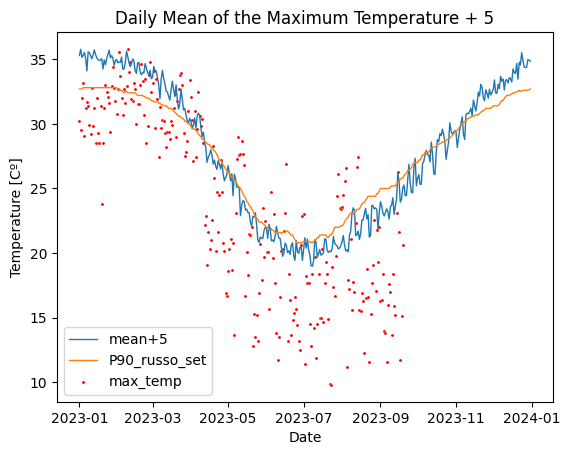

In [331]:
## Some plots for testig

Tadd = 5
Tcrit_type_1 = 'mean+'+str(Tadd)
sns.lineplot(Tcrit(Tcrit_type_1, max_temp, Tadd), y=Tcrit_type_1, x="date", label=Tcrit_type_1, lw=1)

Tcrit_type_2 = 'P90_russo_set'
sns.lineplot(Tcrit(Tcrit_type_2, max_temp, Tadd), y=Tcrit_type_2, x="date", label=Tcrit_type_2, lw=1)


Tind_type_1 = 'max_temp'
sns.scatterplot(Tind(Tind_type_1, max_temp), y=Tind_type_1, x="date", label=Tind_type_1, color = 'red', s=5)
#sns.scatterplot(max_temp_2023, y="max_temp", x="date", label="max_temp", color="red", s=2)

# plt.xlim([max_temp_2023.index.min(), datetime.now()])
# plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Temperature [Cº]")
plt.title("Daily Mean of the Maximum Temperature + " + str(Tadd))
plt.show()

#max_temp_2023

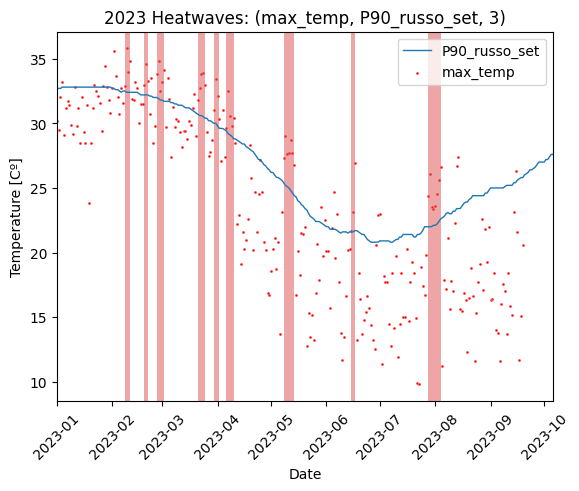

In [355]:
temp_Tind_2 = Tind(Tind_type_1, max_temp)
temp_Tcrit_2 = Tcrit(Tcrit_type_2, max_temp, Tadd)
max_temp_2023 = pd.concat([temp_Tind_2, temp_Tcrit_2], axis = 1)


heatwaves_russo = HWD('max_temp', 'P90_russo_set', 3, max_temp_2023)
plot_single_heatwave(heatwaves_russo, max_temp_2023, 'max_temp', 'P90_russo_set', 3)

#print(type(heatwaves_russo))

a + a1*cos(omega*x) + b1*sin(omega*x) 

a :  27.5  CI ~ N [2.74e+01,2.76e+01]
a1 :  5.81  CI ~ N [5.64e+00,5.98e+00]
b1 :  0.991  CI ~ N [8.24e-01,1.16e+00]


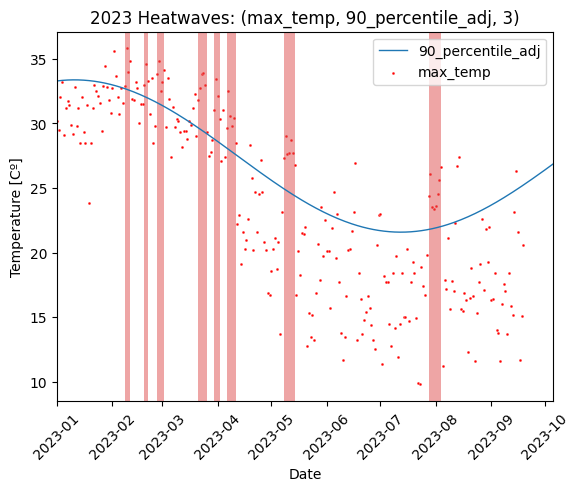

In [344]:
temp_Tind_3 = Tind('max_temp', max_temp)
temp_Tcrit_3 = Tcrit('90_percentile_adj', max_temp)
max_temp_2023_3 = pd.concat([temp_Tind_3, temp_Tcrit_3], axis = 1)


heatwaves_meteochile = HWD('max_temp', '90_percentile_adj', 3, max_temp_2023_3)
plot_single_heatwave(heatwaves_meteochile, max_temp_2023_3, 'max_temp', '90_percentile_adj', 3)

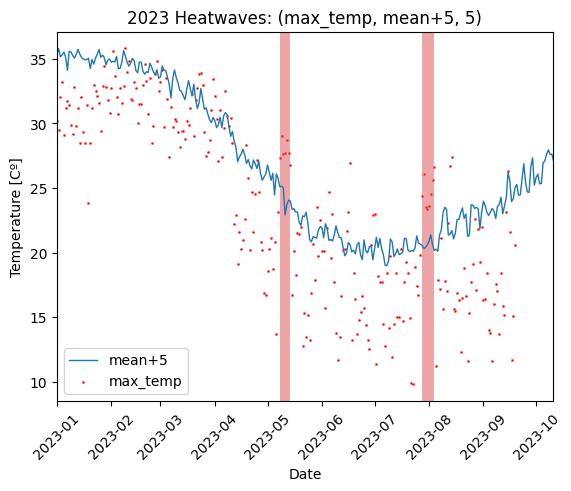

In [364]:
Tadd = 5
Nd = 5
Tcrit_type_2 = 'mean+' + str(Tadd)
temp_Tind_2 = Tind(Tind_type_1, max_temp)
temp_Tcrit_2 = Tcrit(Tcrit_type_2, max_temp, Tadd)
max_temp_2023 = pd.concat([temp_Tind_2, temp_Tcrit_2], axis = 1)


heatwaves_WMO = HWD('max_temp', 'mean+' + str(Tadd), Nd, max_temp_2023)
plot_single_heatwave(heatwaves_WMO, max_temp_2023, 'max_temp', 'mean+' + str(Tadd), Nd)

In [376]:
print(heatwaves_russo)
print(heatwaves_meteochile)
print(heatwaves_WMO)


       start        end  duration  mean_temp  min_temp  max_temp       date
0 2023-07-28 2023-08-04         8  24.712500      23.4      26.6 2023-08-04
1 2023-06-15 2023-06-17         3  23.900000      21.7      26.9 2023-06-17
2 2023-05-08 2023-05-14         7  27.828571      26.8      29.0 2023-05-09
3 2023-04-06 2023-04-10         5  30.580000      29.6      32.5 2023-04-07
4 2023-03-30 2023-04-02         4  31.700000      30.3      33.4 2023-03-31
5 2023-03-21 2023-03-25         5  33.040000      31.8      33.9 2023-03-24
6 2023-02-26 2023-03-02         5  33.680000      32.5      34.8 2023-02-27
7 2023-02-19 2023-02-21         3  33.633333      33.0      34.6 2023-02-20
8 2023-02-08 2023-02-11         4  34.375000      32.9      35.8 2023-02-09
       start        end  duration  mean_temp  min_temp  max_temp       date
0 2023-07-28 2023-08-04         8  24.712500      23.4      26.6 2023-08-04
1 2023-05-08 2023-05-14         7  27.828571      26.8      29.0 2023-05-09
2 2023-04-06

In [368]:
print(type(heatwaves_WMO)) #['start']

<class 'pandas.core.frame.DataFrame'>


In [388]:
# Convert the 'start' and 'end' columns to datetime objects
#df1['start'] = pd.to_datetime(df1['start'])
#df1['end'] = pd.to_datetime(df1['end'])
#df2['start'] = pd.to_datetime(df2['start'])
#df2['end'] = pd.to_datetime(df2['end'])

def intersection_of_HWs(hw1: pd.DataFrame, hw2: pd.DataFrame):
    # Create an empty DataFrame to store the intersection
    intersection = pd.DataFrame(columns=hw1.columns)

    # Iterate through events in the first hw
    for index1, event1 in hw1.iterrows():
        start1, end1 = event1['start'], event1['end']

        # Iterate through events in the second hw
        for index2, event2 in hw2.iterrows():
            start2, end2 = event2['start'], event2['end']

            # Check for overlap
            if (start1 <= end2 and end1 >= start2):
                # If there is an overlap, then add the overlapping event
                #intersection = intersection.append(event1, ignore_index=True)
                intersection = pd.concat([intersection, event1.to_frame().T], ignore_index=True)
                #intersection = pd.append(intersection, event1, ignore_index=True)

    # keep only unique events
    intersection = intersection.drop_duplicates().reset_index(drop=True)

    # TODO: fix mean_temp, min_temp, max_temp, and see what 'date' is in the tabular.
    return intersection

def compoundHWD(hw1, hw2, Nd, logical_connect = 'and'): #Tind_type_1, Tcrit_1, Nd_1, Tind_type_2, Tcrit_type_2, Nd_2):
    intersection = intersection_of_HWs(hw1, hw2)
    ... # TODO: now the intersection needs to be evaluated with the number of days criteria, Nd.


int_russo_metochile = intersection_of_HWs(hw1=heatwaves_russo, hw2=heatwaves_meteochile)

int_russo_metochile


,start,end,duration,mean_temp,min_temp,max_temp,date
0,2023-07-28,2023-08-04,8,24.7125,23.4,26.6,2023-08-04
1,2023-05-08,2023-05-14,7,27.828571,26.8,29.0,2023-05-09
2,2023-04-06,2023-04-10,5,30.58,29.6,32.5,2023-04-07
3,2023-03-30,2023-04-02,4,31.7,30.3,33.4,2023-03-31
4,2023-03-21,2023-03-25,5,33.04,31.8,33.9,2023-03-24
5,2023-02-26,2023-03-02,5,33.68,32.5,34.8,2023-02-27
6,2023-02-19,2023-02-21,3,33.633333,33.0,34.6,2023-02-20
7,2023-02-08,2023-02-11,4,34.375,32.9,35.8,2023-02-09


In [143]:
# add the 90-percentile from MeteoChile to the dataframe
#max_temp_2023 = max_temp_2023.join(df_melted)

# create binary column with 1 if the max_temp is above the (personal) threshold
max_temp_2023.loc[:, "above_threshold"] = (
    max_temp_2023["mean+" + str(Tadd)] < max_temp_2023["max_temp"]
).astype(int)

temps_above_threshold = max_temp_2023[max_temp_2023["above_threshold"] == 1].copy(deep=True)

# create dataframe with heatwaves information (start, end, duration, mean_temp, max_temp, date)
heatwaves = pd.DataFrame(
    columns=["start", "end", "duration", "mean_temp", "min_temp", "max_temp", "date"]
)

# get start and end of continuous heatwaves
heatwaves_dates = []  # [(start, end), (start, end), ...]
for i in range(1, len(temps_above_threshold)):
    # continuous heatwaves
    if temps_above_threshold.index[i] - temps_above_threshold.index[i - 1] == dt.timedelta(days=1):
        # if empty, add first heatwave
        if len(heatwaves_dates) == 0:
            heatwaves_dates.append(
                (temps_above_threshold.index[i - 1], temps_above_threshold.index[i])
            )
        # if not empty, check if the last heatwave is continuous
        else:
            # if continuous, update end date
            if heatwaves_dates[-1][1] == temps_above_threshold.index[i - 1]:
                heatwaves_dates[-1] = (heatwaves_dates[-1][0], temps_above_threshold.index[i])
            # if not continuous, add new heatwave
            else:
                heatwaves_dates.append(
                    (temps_above_threshold.index[i - 1], temps_above_threshold.index[i])
                )

for idx, hw_dates in enumerate(heatwaves_dates):
    # get start and end dates
    start = hw_dates[0]
    end = hw_dates[1]

    # get duration
    duration = (end - start).days + 1

    # get mean and max temp
    mean_temp = max_temp_2023.loc[start:end, "max_temp"].mean()
    min_temp = max_temp_2023.loc[start:end, "max_temp"].min()
    max_temp = max_temp_2023.loc[start:end, "max_temp"].max()

    # get max_temp date
    date = max_temp_2023.loc[start:end, "max_temp"].idxmax()

    # add to dataframe
    heatwaves.loc[idx] = [start, end, duration, mean_temp, min_temp, max_temp, date]

# filter heatwaves with duration >= 3 days
heatwaves = (
    heatwaves[heatwaves["duration"] >=  Nd]
    .sort_values(by="start", ascending=False)
    .reset_index(drop=True)
)

heatwaves

,start,end,duration,mean_temp,min_temp,max_temp,date
0,2023-07-27,2023-08-04,9,24.166667,19.8,26.6,2023-08-04
1,2023-06-13,2023-06-17,5,22.440000,20.2,26.9,2023-06-17
2,2023-05-08,2023-05-14,7,27.828571,26.8,29.0,2023-05-09
3,2023-04-06,2023-04-11,6,30.233333,28.5,32.5,2023-04-07
4,2023-03-29,2023-04-02,5,31.100000,28.7,33.4,2023-03-31
5,2023-03-21,2023-03-26,6,32.416667,29.3,33.9,2023-03-24
6,2023-02-26,2023-03-02,5,33.680000,32.5,34.8,2023-02-27


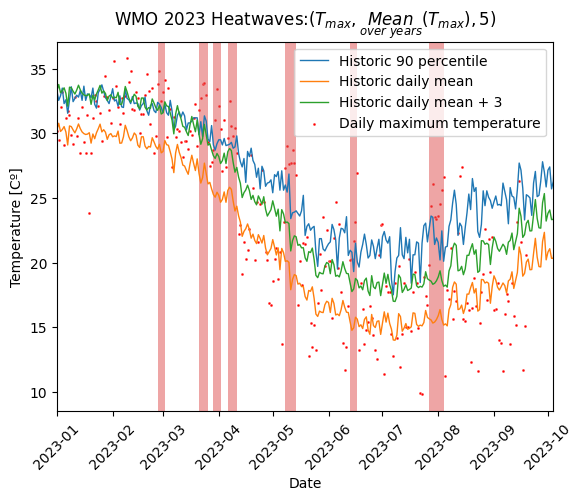

In [144]:
sns.lineplot(
    max_temp_2023,
    y="P90",
    x="date",
    #label=r"$P_{90}^{over \ years} (T_{max}) $", #"Historic 90 percentile",
    label="Historic 90 percentile",
    lw=1,
)


sns.lineplot(
    max_temp_2023,
    y="mean",
    x="date",
    label="Historic daily mean",
    lw=1,
)

sns.lineplot(
    max_temp_2023,
    y="mean+" + str(Tadd),
    x="date",
    label="Historic daily mean + " + str(Tadd),
    lw=1,
)

sns.scatterplot(
    max_temp_2023,
    y="max_temp",
    x="date",
    label="Daily maximum temperature",
    color="red",
    s=4,
)

# vertical span for heatwaves
heatwaves_dates = heatwaves[["start", "end"]].values
for hw_dates in heatwaves_dates:
    plt.axvspan(hw_dates[0], hw_dates[1], facecolor="#DE4D4D", alpha=0.5)

plt.xlim([max_temp_2023.index.min(), datetime.now()])
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Temperature [Cº]")
plt.title("WMO 2023 Heatwaves:" + r"$(T_{max}, \underset{over \ years}{Mean}(T_{max}),$" + str(Nd) + "$)$")
plt.show()

## Def: Russo 2014

## MeteoChile - Extreme threshold


### New Methodology

The **daily 90-percentile computation** is done through **HANTS**. Main idea is the following:

1. adjust a function that represents the series
2. compute `max_temp` columns according to the adjusted function
3. get the **90-percentile** from the simulated values given by the predicted values


In [7]:
from calendar import monthrange
from datetime import datetime

# get the number of days in each month for given year
#   - with this data we can compute the ext_threhold for each month/day in the year
year = datetime.now().year
month_days = {"year": year, "month_days": {m: monthrange(year, m)[1] for m in range(1, 13)}}
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

month_days

{'year': 2023,
 'month_days': {1: 31,
  2: 28,
  3: 31,
  4: 30,
  5: 31,
  6: 30,
  7: 31,
  8: 31,
  9: 30,
  10: 31,
  11: 30,
  12: 31}}

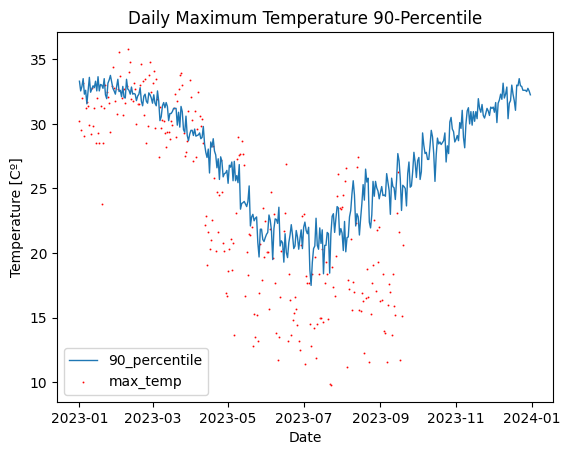

,max_temp,90_percentile
date,,
2023-01-01,30.2,33.3
2023-01-02,29.5,32.55
2023-01-03,32.0,32.9
2023-01-04,33.2,33.5
2023-01-05,29.1,32.3
...,...,...
2023-12-27,NaN,32.6
2023-12-28,NaN,32.5
2023-12-29,NaN,32.75


In [10]:
# compute the 90-percentile for each month/day in the year
max_temp_2023 = pd.DataFrame(
    [],
    columns=["max_temp", "90_percentile"],
    index=pd.Index(pd.date_range(start_date, end_date, freq="D"), name="date"),
)

# add entries from 2023
max_temp_2023["max_temp"] = max_temp[max_temp.index.year == 2023]

for month in month_days["month_days"]:
    for day in range(1, month_days["month_days"][month] + 1):
        # the period used to compute the extreme threhold is 1981-2010 (Meteochile, 2020)
        # TODO: validate with scatter plot: 90-percentile vs max_temp (w/ different colors)
        f_max_temp = max_temp[
            (1981 <= max_temp.index.year)
            & (max_temp.index.year <= 2010)
            & (max_temp.index.day == day)
            & (max_temp.index.month == month)
        ]

        # TODO: update the following line with the 90_percentile from the HANTS adjusted data
        # * Discuss interpolation param with @elwin. It's clear it is not 'lower'|' higher'|'nearest'
        # * as the value is not in the data. But, what is the best option? 'midpoint' | 'linear'?
        max_temp_2023.loc[datetime(year, month, day), "90_percentile"] = f_max_temp.quantile(
            0.9, interpolation="midpoint"
        ).values[0]

sns.lineplot(max_temp_2023, y="90_percentile", x="date", label="90_percentile", lw=1)
sns.scatterplot(max_temp_2023, y="max_temp", x="date", label="max_temp", color="red", s=2)

# plt.xlim([max_temp_2023.index.min(), datetime.now()])
# plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Temperature [Cº]")
plt.title("Daily Maximum Temperature 90-Percentile")
plt.show()

max_temp_2023

1. fit sin() in the above table.
2. feq = 0, this time we only consider constant Trend (a + bt -> a)


a + a1*cos(omega*x) ¿+ b1*sin(omega*x) 

a :  27.5  CI ~ N [2.74e+01,2.76e+01]
a1 :  5.81  CI ~ N [5.64e+00,5.98e+00]
b1 :  0.991  CI ~ N [8.24e-01,1.16e+00]

RSS model sine curve : 324.34


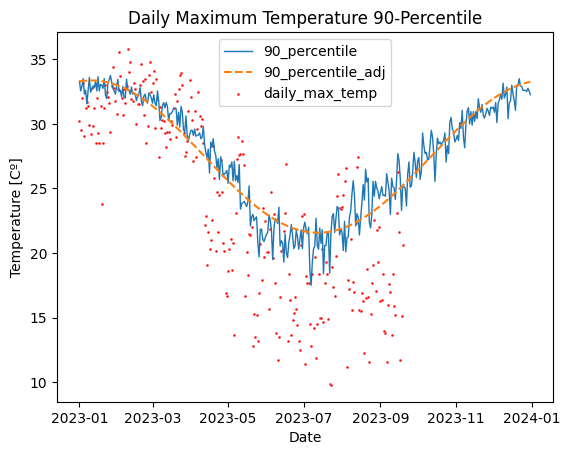

,max_temp,90_percentile,90_percentile_adj
date,,,
2023-01-01,30.2,33.3,33.278560
2023-01-02,29.5,32.55,33.294753
2023-01-03,32.0,32.9,33.309223
2023-01-04,33.2,33.5,33.321965
2023-01-05,29.1,32.3,33.332975
...,...,...,...
2023-12-27,NaN,32.6,33.165478
2023-12-28,NaN,32.5,33.190630
2023-12-29,NaN,32.75,33.214089


In [11]:
# TODO: improve fitting of function
# compute the 90-percentile for the given day
import datetime as dt
from scipy.stats import norm
from scipy.optimize import curve_fit


# new method
temp_t = max_temp_2023["90_percentile"].copy(deep=True)
temp_t = temp_t.to_frame()


def model(x, params):
    a, a1, b1 = params
    omega = 2 * np.pi / 365.25  # 365.25
    theta = np.arctan(a1 / b1)
    alpha = np.sqrt(a1**2 + b1**2)

    y_pred = a + alpha * np.sin(omega * x + theta)
    return y_pred


def model_fit(x, a, a1, b1):
    omega = 2 * np.pi / 365.25
    y_pred = a + a1 * np.cos(omega * x) + b1 * np.sin(omega * x)
    return y_pred


def RSS(y, y_pred) -> float:
    return np.sqrt((y - y_pred) ** 2).sum()


if isinstance(temp_t.index, pd.DatetimeIndex):
    first_ord = temp_t.index.map(dt.datetime.toordinal)[0]
    temp_t.index = temp_t.index.map(dt.datetime.toordinal)


params, cov = curve_fit(
    model_fit, xdata=temp_t.index - first_ord, ydata=temp_t["90_percentile"], method="lm"
)
param_list = ["a", "a1", "b1"]
print("a + a1*cos(omega*x) + b1*sin(omega*x) \n")

std_dev = np.sqrt(np.diag(cov))
for name, p, sd in zip(param_list, params, std_dev):
    print(
        "{0} :  {1:0.3}  CI ~ N [{2:0.2e},{3:0.2e}]".format(name, p, p - 1.96 * sd, p + 1.96 * sd)
    )

max_temp_2023.loc[:, "90_percentile_adj"] = model(temp_t.index - first_ord, params)
if isinstance(temp_t.index, pd.DatetimeIndex):
    temp_t.index = temp_t.index.map(dt.datetime.toordinal)

print(
    "\nRSS model sine curve :",
    round(
        RSS(
            max_temp_2023["90_percentile"].astype(float),
            max_temp_2023["90_percentile_adj"].astype(float),
        ),
        2,
    ),
)

sns.lineplot(max_temp_2023, y="90_percentile", x="date", label="90_percentile", lw=1)
sns.lineplot(
    max_temp_2023, y="90_percentile_adj", x="date", label="90_percentile_adj", lw=1.5, ls="--"
)
sns.scatterplot(max_temp_2023, y="max_temp", x="date", label="daily_max_temp", color="red", s=4)

# plt.xlim([max_temp_2023.index.min(), datetime.now()])
# plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Temperature [Cº]")
plt.title("Daily Maximum Temperature 90-Percentile")
plt.show()

max_temp_2023

In [10]:
# get threholds from Meteochile for the station of interest
thresholds_meteochile = su.html_table_to_xlsx(
    f"https://climatologia.meteochile.gob.cl/application/historico/umbralesOlasDeCalorEstacion/{STATION_ID}",
    "excel",  # this can be checked out on the source code of the page
    f"{INPUT_PATH}/thresholds.xlsx",
)
thresholds_meteochile

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
day,,,,,,,,,,,,
1,32.5,33.0,32.1,29.4,25.7,22.3,20.9,21.9,24.4,27.2,29.5,31.2
2,32.5,33.0,32.0,29.3,25.5,22.2,20.9,21.9,24.5,27.2,29.6,31.3
3,32.6,33.0,32.0,29.1,25.4,22.1,20.9,22.0,24.6,27.3,29.6,31.3
4,32.6,32.9,31.9,29.0,25.3,22.1,20.9,22.1,24.7,27.4,29.7,31.4
5,32.6,32.9,31.8,28.9,25.2,22.0,20.9,22.1,24.8,27.5,29.8,31.4
6,32.7,32.9,31.8,28.8,25.0,21.9,20.9,22.2,24.9,27.6,29.8,31.5
7,32.7,32.9,31.7,28.7,24.9,21.8,20.9,22.3,25.0,27.7,29.9,31.5
8,32.7,32.9,31.6,28.6,24.8,21.8,20.9,22.3,25.1,27.7,30.0,31.6
9,32.7,32.9,31.5,28.4,24.7,21.7,20.9,22.4,25.1,27.8,30.0,31.6


In [11]:
# First, reset the index to move day into a column
df = thresholds_meteochile.reset_index()

# Then use `melt` to reverse the pivot
df_melted = df.melt(id_vars="day", var_name="month", value_name="90_percentile_meteochile")

# Convert month name back to number
months_mapper = {f"{i:02d}": dt.date(1900, i, 1).strftime("%b") for i in range(1, 13)}
r_months_mapper = {v: k for k, v in months_mapper.items()}  # reverse the mapper
df_melted["month"] = df_melted["month"].map(r_months_mapper)

# Convert day and month to integer for proper sorting
df_melted["month"] = df_melted["month"].astype(int)
df_melted["day"] = df_melted["day"].astype(int)

# Sort by month and day
df_melted.sort_values(by=["month", "day"], inplace=True)

# If you want to reset the index
df_melted = df_melted.dropna().reset_index(drop=True)

# remove 2023-02-29
df_melted = df_melted[~((df_melted.month == 2) & (df_melted.day == 29))]

# datetime index for current year from day and month columns
df_melted["date"] = df_melted[["month", "day"]].apply(
    lambda x: dt.date(2023, x.month, x.day), axis=1
)
df_melted.drop(columns=["month", "day"], inplace=True)
df_melted.set_index("date", inplace=True, drop=True)

df_melted

,90_percentile_meteochile
date,
2023-01-01,32.5
2023-01-02,32.5
2023-01-03,32.6
2023-01-04,32.6
2023-01-05,32.6
...,...
2023-12-27,32.4
2023-12-28,32.4
2023-12-29,32.4


In [12]:
# reproduce MeteoChile 'Umbrales Olas de Calor (Diurna)' report to check whether the HANTS
# algorithm is working as expected regarding the defintion of the 90-percentile
ans = max_temp_2023[["90_percentile_adj"]].copy(deep=True)

ans["month"] = ans.index.strftime("%m")
ans["day"] = ans.index.strftime("%d")

thresholds_pivot = ans.pivot(index="day", columns="month", values="90_percentile_adj").rename(
    columns=months_mapper
)
thresholds_pivot.index = thresholds_pivot.index.astype(int)
thresholds_pivot = thresholds_pivot.round(1)

thresholds_pivot

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
day,,,,,,,,,,,,
1,33.3,33.0,31.4,28.6,25.6,23.0,21.7,21.9,23.7,26.4,29.5,32.0
2,33.3,32.9,31.3,28.5,25.5,22.9,21.7,21.9,23.7,26.5,29.6,32.0
3,33.3,32.9,31.2,28.4,25.4,22.9,21.7,22.0,23.8,26.6,29.7,32.1
4,33.3,32.9,31.1,28.3,25.3,22.8,21.6,22.0,23.9,26.7,29.8,32.1
5,33.3,32.8,31.1,28.2,25.2,22.8,21.6,22.1,24.0,26.8,29.9,32.2
6,33.3,32.8,31.0,28.1,25.1,22.7,21.6,22.1,24.1,26.9,29.9,32.3
7,33.3,32.7,30.9,28.0,25.0,22.6,21.6,22.1,24.2,27.0,30.0,32.3
8,33.4,32.7,30.8,27.9,24.9,22.6,21.6,22.2,24.2,27.1,30.1,32.4
9,33.4,32.6,30.7,27.8,24.8,22.5,21.6,22.2,24.3,27.2,30.2,32.4


In [13]:
# add the 90-percentile from MeteoChile to the dataframe
max_temp_2023 = max_temp_2023.join(df_melted)

# create binary column with 1 if the max_temp is above the (personal) threshold
max_temp_2023.loc[:, "above_threshold"] = (
    max_temp_2023["90_percentile_adj"] < max_temp_2023["max_temp"]
).astype(int)

temps_above_threshold = max_temp_2023[max_temp_2023["above_threshold"] == 1].copy(deep=True)

# create dataframe with heatwaves information (start, end, duration, mean_temp, max_temp, date)
heatwaves = pd.DataFrame(
    columns=["start", "end", "duration", "mean_temp", "min_temp", "max_temp", "date"]
)

# get start and end of continuous heatwaves
heatwaves_dates = []  # [(start, end), (start, end), ...]
for i in range(1, len(temps_above_threshold)):
    # continuous heatwaves
    if temps_above_threshold.index[i] - temps_above_threshold.index[i - 1] == dt.timedelta(days=1):
        # if empty, add first heatwave
        if len(heatwaves_dates) == 0:
            heatwaves_dates.append(
                (temps_above_threshold.index[i - 1], temps_above_threshold.index[i])
            )
        # if not empty, check if the last heatwave is continuous
        else:
            # if continuous, update end date
            if heatwaves_dates[-1][1] == temps_above_threshold.index[i - 1]:
                heatwaves_dates[-1] = (heatwaves_dates[-1][0], temps_above_threshold.index[i])
            # if not continuous, add new heatwave
            else:
                heatwaves_dates.append(
                    (temps_above_threshold.index[i - 1], temps_above_threshold.index[i])
                )

for idx, hw_dates in enumerate(heatwaves_dates):
    # get start and end dates
    start = hw_dates[0]
    end = hw_dates[1]

    # get duration
    duration = (end - start).days + 1

    # get mean and max temp
    mean_temp = max_temp_2023.loc[start:end, "max_temp"].mean()
    min_temp = max_temp_2023.loc[start:end, "max_temp"].min()
    max_temp = max_temp_2023.loc[start:end, "max_temp"].max()

    # get max_temp date
    date = max_temp_2023.loc[start:end, "max_temp"].idxmax()

    # add to dataframe
    heatwaves.loc[idx] = [start, end, duration, mean_temp, min_temp, max_temp, date]

# filter heatwaves with duration >= 3 days
heatwaves = (
    heatwaves[heatwaves["duration"] >= 3]
    .sort_values(by="start", ascending=False)
    .reset_index(drop=True)
)

heatwaves

,start,end,duration,mean_temp,min_temp,max_temp,date
0,2023-05-08,2023-05-14,7,27.828571,26.8,29.0,2023-05-09
1,2023-04-06,2023-04-11,6,30.233333,28.5,32.5,2023-04-07
2,2023-03-30,2023-04-02,4,31.700000,30.3,33.4,2023-03-31
3,2023-03-21,2023-03-26,6,32.416667,29.3,33.9,2023-03-24
4,2023-02-26,2023-03-02,5,33.680000,32.5,34.8,2023-02-27
5,2023-02-19,2023-02-21,3,33.633333,33.0,34.6,2023-02-20
6,2023-02-08,2023-02-11,4,34.375000,32.9,35.8,2023-02-09


In [14]:
# TODO: automate over years
yearly_hw_stats = pd.DataFrame(
    [],
    index=pd.Index([], name="year", dtype=int),
    columns=[
        "n_hw",
        "mean_hw_temp",
        "max_hw_temp",
        "min_hw_temp",
        "mean_hw_duration",
        "max_hw_duration",
        "min_hw_duration",
    ],
)

yearly_hw_stats.loc[2023, "n_hw"] = len(heatwaves)
yearly_hw_stats.loc[2023, "mean_hw_temp"] = heatwaves["mean_temp"].mean()
yearly_hw_stats.loc[2023, "max_hw_temp"] = heatwaves["max_temp"].max()
yearly_hw_stats.loc[2023, "min_hw_temp"] = heatwaves["min_temp"].min()
yearly_hw_stats.loc[2023, "mean_hw_duration"] = heatwaves["duration"].mean()
yearly_hw_stats.loc[2023, "max_hw_duration"] = heatwaves["duration"].max()
yearly_hw_stats.loc[2023, "min_hw_duration"] = heatwaves["duration"].min()

yearly_hw_stats

,n_hw,mean_hw_temp,max_hw_temp,min_hw_temp,mean_hw_duration,max_hw_duration,min_hw_duration
year,,,,,,,
2023,7,31.980986,35.8,26.8,5.0,7,3


In [15]:
# TODO: per station historic stats

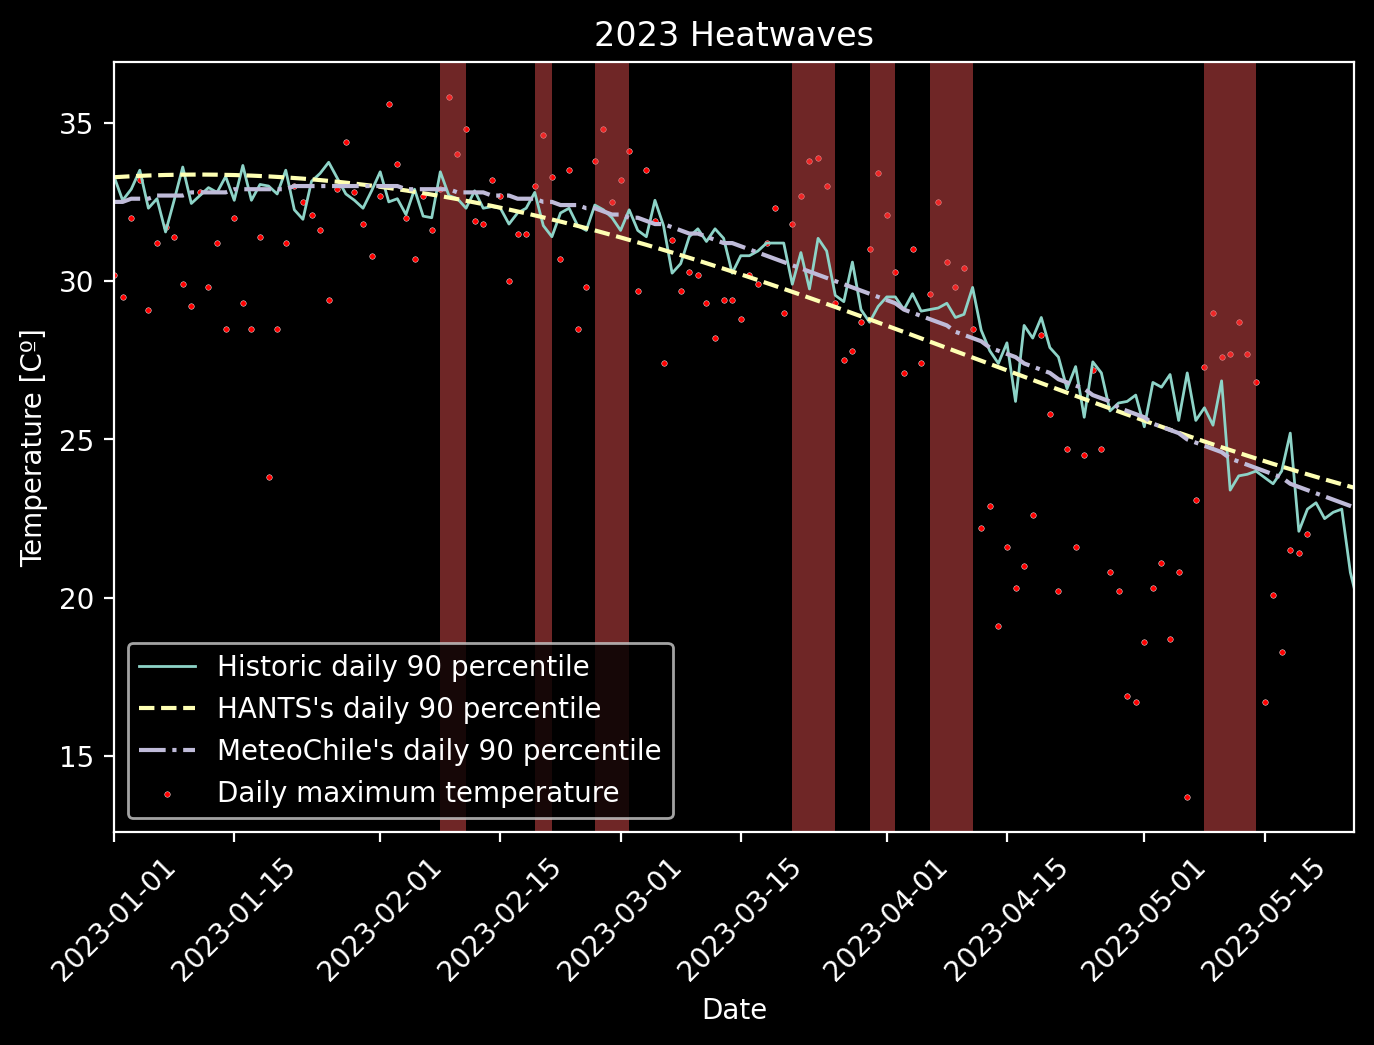

In [16]:
sns.lineplot(
    max_temp_2023,
    y="90_percentile",
    x="date",
    label="Historic daily 90 percentile",
    lw=1,
)
sns.lineplot(
    max_temp_2023,
    y="90_percentile_adj",
    x="date",
    label="HANTS's daily 90 percentile",
    lw=1.5,
    ls="--",
)
sns.lineplot(
    max_temp_2023,
    y="90_percentile_meteochile",
    x="date",
    label="MeteoChile's daily 90 percentile",
    lw=1.5,
    ls="-.",
)
sns.scatterplot(
    max_temp_2023,
    y="max_temp",
    x="date",
    label="Daily maximum temperature",
    color="red",
    s=4,
)

# vertical span for heatwaves
heatwaves_dates = heatwaves[["start", "end"]].values
for hw_dates in heatwaves_dates:
    plt.axvspan(hw_dates[0], hw_dates[1], facecolor="#DE4D4D", alpha=0.5)

plt.xlim([max_temp_2023.index.min(), datetime.now()])
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Temperature [Cº]")
plt.title("2023 Heatwaves")
plt.show()